<a href="https://colab.research.google.com/github/zhijunm/Text_Mining/blob/master/VectorSpaceModel_TF-IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import nltk 
from pprint import pprint
import csv
from typing import List
import re
from collections import Counter
import numpy as np

In [3]:
# Data from here: 
# https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/data#IMDB%20Dataset.csv
# check sample data
ctr = 0
with open("IMDB Dataset.csv", newline="") as csvfile:
  movie_data = csv.reader(csvfile, delimiter=",")
  for row in movie_data:
    if ctr > 5:
      break
    print(row)
    ctr += 1

['review', 'sentiment']
["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of 

In [0]:
def simple_tokenizer(text:str) -> List[str]:
  # look at the text, we see that <br></br> which is HTML tag for line break can be a good slitter
  # a sentence (at least well structured) often has a full spot at the end. We use there two for work breaks
  pattern1 = re.compile("<be /><br />|\.")
  lines = re.split(pattern1, text)
  # you can break a sentence into words using whitespace based split
  tokens = []
  for line in lines:
    tokens += line.split(" ")

  # lowercase and remove any non-alphanumeric characters from tokens for normalize
  normalized_tokens = [re.sub(r"\W+", "", token.lower()) for token in tokens]
  return normalized_tokens


In [5]:
# remove stop-words
from nltk.corpus import stopwords # library
nltk.download('stopwords')
all_stopwords = set(stopwords.words('english')) # set the language

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
# tokenize each review using simple tokenizer
# like before and remove stopwords
reviews_list = []
with open("IMDB Dataset.csv", newline="") as csvfile:
  movie_data = csv.reader(csvfile, delimiter = ",")
  for row in movie_data:
    if row[0] == "review":
      continue
    review_text = row[0]
    tokens = simple_tokenizer(review_text)
    # remove stopwords
    clean_tokens = [
        tokens
        for tokens in tokens
        if tokens not in all_stopwords and len(tokens) > 1
    ]
    reviews_list.append(clean_tokens)

In [7]:
# the end result is a map with key as review_id and value as review
pprint('number of reviews:' + str(len(reviews_list)))
pprint('sample row:')
print(reviews_list[0])

'number of reviews:50000'
'sample row:'
['one', 'reviewers', 'mentioned', 'watching', 'oz', 'episode', 'youll', 'hooked', 'right', 'exactly', 'happened', 'br', 'br', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scenes', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pulls', 'punches', 'regards', 'drugs', 'sex', 'violence', 'hardcore', 'classic', 'use', 'word', 'br', 'br', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focuses', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'many', 'aryans', 'muslims', 'gangstas', 'latinos', 'christians', 'italians', 'irish', 'scuffles', 'death', 'stares', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'away', 'br', 'br', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goes', 'shows', 'wouldnt', 'dare

In [0]:
## Identify unique tokens count their term frequency in each review and document frequency
tf_dict = {}  # data structure to hold term frequencies in each reviews
df_dict = (
    Counter()
)  # data structure to hold document frequency. You can read more about 'Counters' here: https://docs.python.org/3.1/library/collections.html
# token_counter=0
for review_id, review_tokens in enumerate(reviews_list):
    tf_dict[review_id] = Counter()
    for token in review_tokens:
        if token not in df_dict:
            df_dict[token] = 1
        if token in tf_dict[review_id]:
            tf_dict[review_id][token] += 1
        else:
            tf_dict[review_id][token] = 1
            df_dict[token] += 1


In [12]:
pprint("number of unique tokens: " + str(len(df_dict)))

'number of unique tokens: 157305'


(0.0, 100.0)

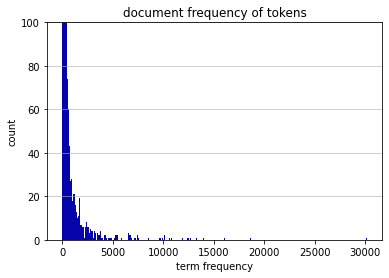

In [13]:
# since the number of unique words is too high, we plot histogram to see extremly common or extrmely rare tokens
import matplotlib.pyplot as plt
n, bins, patchese = plt.hist(x=list(df_dict.values()), bins=1000, color="#0504aa")
plt.grid(axis="y", alpha=0.75)
plt.xlabel("term frequency")
plt.ylabel("count")
plt.title("document frequency of tokens")
maxfreq = n.max()
# set a clean upper y-axis limit
plt.ylim(ymax=100)

In [14]:
# remove tokens which are extremely common or extremely rare
lower_count_thr = 100 # rare words/tokens, not to use words that only apprear 100 docs
upper_count_thr = 5000 # frequent/common tokens, not to use words that appear over 5000 docs
trim_df_dict = Counter(
    {
        token: df_dict[token]
        for token in df_dict
        if lower_count_thr <=df_dict[token] <= upper_count_thr
    }
)
pprint("number of unique tokens after trimming:" + str(len(trim_df_dict)))
pprint("most frequent tokens")
pprint(trim_df_dict.most_common(10))
pprint("least frequent tokens")
pprint(trim_df_dict.most_common()[:-11:-1])

'number of unique tokens after trimming:6079'
'most frequent tokens'
[('bit', 4983),
 ('far', 4941),
 ('since', 4908),
 ('script', 4872),
 ('role', 4847),
 ('probably', 4840),
 ('last', 4808),
 ('might', 4799),
 ('feel', 4783),
 ('away', 4741)]
'least frequent tokens'
[('tormented', 100),
 ('unfamiliar', 100),
 ('absorbing', 100),
 ('aiming', 100),
 ('filmbr', 100),
 ('clouds', 100),
 ('cemetery', 100),
 ('weaker', 100),
 ('gigantic', 100),
 ('arty', 100)]


In [0]:
# create token to id maps
token_to_id_dict = {
    token: index for index, token in enumerate(trim_df_dict)
}  # http://book.pythontips.com/en/latest/enumerate.html
id_to_token_dict = {index: token for index, token in enumerate(trim_df_dict)}
tf_idf_values = []
N = len(reviews_list)
# we are ready to compute tfidf
from math import log


tf_idf_lists = []

ctr = 0
for review_id, review_tokens in enumerate(reviews_list):

    # since its not advised to hold full tf-idf dictionary due to limited  RAM, we only compute
    # tf-idf of top 1000 reviews. IN practice the vectors are dumped to storage (a file)
    # line by line
    if ctr > 1000:
        break
    ctr += 1
    tf_idf_list = [0] * len(token_to_id_dict)
    for token in review_tokens:
        if token not in token_to_id_dict:
            continue
        token_id = token_to_id_dict[token]
        # TFIDF formula
        if token not in tf_dict[review_id]:
            continue
        tf = tf_dict[review_id][token]
        idf = log(N / df_dict[token], 10)  # log to base 10
        tf_idf = tf * idf
        tf_idf_list[token_id] = tf_idf
        tf_idf_values.append(tf_idf)
    tf_idf_lists.append(tf_idf_list)

In [16]:
# print sample tfidf vector values
review_id =2
tf_idf_vector = [tf_idf_lists[review_id][index] for index in [token_to_id_dict[token] for token in tf_dict[review_id] if token in token_to_id_dict]]
pprint(tf_idf_vector[:10])

[1.2575891194195075,
 1.7267671659569541,
 1.6631401790831903,
 1.931814138253838,
 2.159893905543242,
 1.764976840504776,
 1.6836102489268043,
 1.5770820192323376,
 2.387216143280264,
 2.0880475555033486]
